In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
ga_counties = gpd.read_file("./GeorgiaCounties/GeorgiaCounties.shp")
combined_nlcd = pd.read_csv ("./Processed/Combined_NLCD.csv")

DataSourceError: ./GeorgiaCounties/GeorgiaCounties.shp: No such file or directory

In [ ]:
combined_nlcd.dropna(subset=["Area"], inplace=True)
combined_nlcd.rename(columns={"Period": "LC_Types"}, inplace=True)
combined_nlcd["Year"] = pd.to_datetime(combined_nlcd["Year"], format="%Y")

total = combined_nlcd.groupby(['County', 'Year'])['Area'].sum().reset_index()
total.rename(columns={'Area': 'Total_Area'}, inplace=True)
combined_nlcd = combined_nlcd.merge(total, on=['County','Year'])

In [ ]:
past_nlcd = combined_nlcd[
(combined_nlcd["Year"].dt.year == 2000) | (combined_nlcd["Year"].dt.year == 2001)|(combined_nlcd["Year"].dt.year == 2002)|(combined_nlcd["Year"].dt.year == 2003)|(combined_nlcd["Year"].dt.year == 2004)|(combined_nlcd["Year"].dt.year == 2005)
].copy()
print(past_nlcd.columns)

present_nlcd = combined_nlcd[
(combined_nlcd["Year"].dt.year == 2018) | (combined_nlcd["Year"].dt.year == 2019)|(combined_nlcd["Year"].dt.year == 2020)|(combined_nlcd["Year"].dt.year == 2021)|(combined_nlcd["Year"].dt.year == 2022)|(combined_nlcd["Year"].dt.year == 2023)
].copy()
print(present_nlcd.columns)

In [ ]:
merged_gdf = ga_counties.merge(past_nlcd,left_on = "CountyFull", right_on = "County", how = "inner")
print(merged_gdf.columns)

merged_gdf["Year"] = pd.to_datetime(merged_gdf["Year"], format="%Y")
filtered_gdf = merged_gdf[(merged_gdf["Year"].dt.year == 2000)]

dominant = filtered_gdf.groupby("County").apply(
    lambda group: group.loc[group["Area"].idxmax()]["Period"]
).to_dict()

filtered_gdf["dominant_land_cover"] = filtered_gdf["County"].map(dominant)

In [ ]:
filtered_gdf.to_file("nlcd_2019.shp")

C:\Users\Jingh\AppData\Local\Temp\ipykernel_6284\887238533.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  filtered_gdf.to_file("nlcd_2020.shp")
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field Year create as date field, though DateTime requested.
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'dominant_land_cover' to 'dominant_l'
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 5570179458.71968555 of field ShapeSTAre of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 55

In [3]:
merged_gdf.head()

OBJECTID_1 STATEFP10 COUNTYFP10 GEOID10  NAME10     NAMELSAD10  totpop10  \
0           1        13        173   13173  Lanier  Lanier County     10078   
1           1        13        173   13173  Lanier  Lanier County     10078   
2           1        13        173   13173  Lanier  Lanier County     10078   
3           1        13        173   13173  Lanier  Lanier County     10078   
4           1        13        173   13173  Lanier  Lanier County     10078   

  WFD RDC_AAA MNGWPD  ...                                GlobalID LINC_Regio  \
0   N       N      N  ...  {7D637994-1D29-4646-A85C-439C1A06EA0E}         11   
1   N       N      N  ...  {7D637994-1D29-4646-A85C-439C1A06EA0E}         11   
2   N       N      N  ...  {7D637994-1D29-4646-A85C-439C1A06EA0E}         11   
3   N       N      N  ...  {7D637994-1D29-4646-A85C-439C1A06EA0E}         11   
4   N       N      N  ...  {7D637994-1D29-4646-A85C-439C1A06EA0E}         11   

     ShapeSTAre     ShapeSTLen  \
0  5.570179e+09  407122.504849   
1  5.570179e+09  407122.504849   
2  5.570179e+09  407122.504849   
3  5.570179e+09  407122.504849   
4  5.570179e+09  407122.504849   

                                            geometry  Unnamed: 0  \
0  POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...       49725   
1  POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...       49726   
2  POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...       49727   
3  POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...       49728   
4  POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...       49729   

                       Period       Year       Area         County  
0                  Open Water 1985-01-01   3.589226  Lanier County  
1        Developed Open Space 1985-01-01  19.987346  Lanier County  
2     Developed Low Intensity 1985-01-01   6.957051  Lanier County  
3  Developed Medium Intensity 1985-01-01   0.321302  Lanier County  
4    Developed High Intensity 1985-01-01   0.087301  Lanier County  

[5 rows x 28 columns]

In [4]:
#1st visual most prominent land cover type for each county in year 2023
merged_2023 = merged_gdf[merged_gdf["Year"].dt.year == 2023].copy()
max_idx = merged_2023.groupby("NAMELSAD10")["Area"].idxmax()
prominent_lc = merged_2023.loc[max_idx]

lc_color_map = {
    "Open Water": "blue",
    "Developed Open Space": "pink",
    "Developed Low Intensity": "darkgray",
    "Developed Medium Intensity": "dimgray",
    "Developed High Intensity": "red",
    "Barren Land (Rock/Sand/Clay)": "peru",
    "Deciduous Forest": "limegreen",
    "Evergreen Forest": "forestgreen",
    "Mixed Forest": "darkgreen",
    "Shrub/Shrub": "olivedrab", 
    "Grasslands/Herbaceous": "palegoldenrod",
    "Pasture/Hay": "yellow",
    "Cultivated Crops": "orange",
    "Woody Wetlands": "teal",
    "Emergent Herbaceous Wetlands": "aqua"
}

prominent_lc["color"] = prominent_lc["Period"].map(lc_color_map).fillna("black")

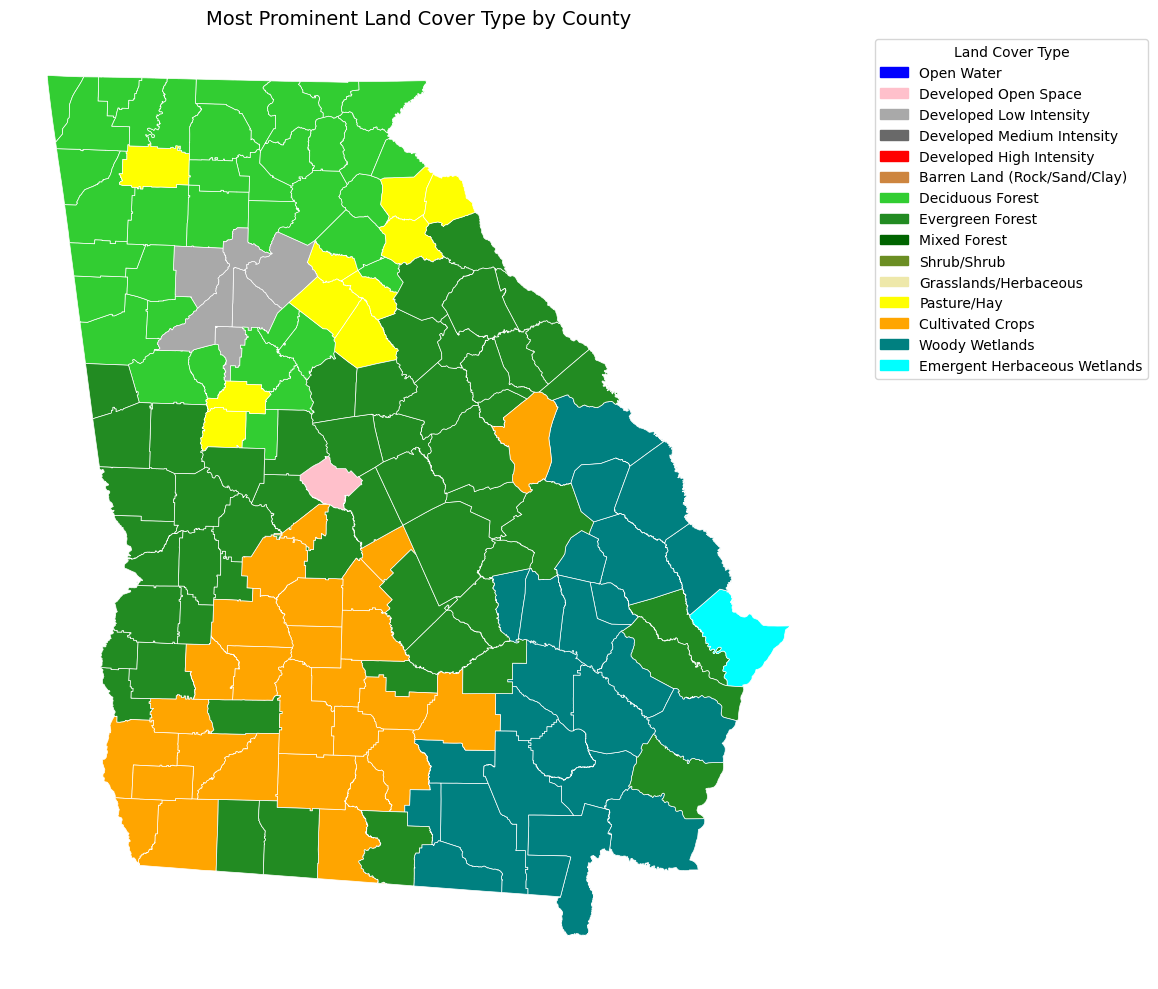

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
prominent_lc.plot(ax=ax, color=prominent_lc["color"], edgecolor="white", linewidth=0.5)

ax.set_title("Most Prominent Land Cover Type by County(2023)", fontsize=14)
ax.axis("off")

handles = []
for lc_type, color in lc_color_map.items():
    patch = mpatches.Patch(color=color, label=lc_type)
    handles.append(patch)

ax.legend(handles=handles, title="Land Cover Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()